# Cabbeling experiments

This notebook contains plots from the cabbeling experiments.
The folder also contains animations of the density field, tracers, and density reference profile.

The saved data is broken up into:

- `tracers.nc`;
- `computed_output.nc`; and
- `energy_diagnostics.nc`.

`energy_diagnostics.nc` is computed in post processing.

In [3]:
cd("/g/data/e14/jb2381/CabbelingExperiments")
ENV["JULIA_DEPOT_PATH"] = "/home/561/jb2381/.julia"
using Pkg
Pkg.activate(@__DIR__)

  Activating project at `/g/data/e14/jb2381/CabbelingExperiments`


In [4]:
using NCDatasets, CairoMakie, TwoLayerDirectNumericalShenanigans

In [10]:
computed_output = joinpath(pwd(), "outputs_equaldiffusion/cabbeling_stepchange_nothing_660min/computed_output.nc")
tracers = joinpath(pwd(), "outputs_equaldiffusion/cabbeling_stepchange_nothing_660min/tracers.nc")
energetics = joinpath(pwd(), "outputs_equaldiffusion/cabbeling_stepchange_nothing_660min/energy_diagnostics.nc")

"/g/data/e14/jb2381/CabbelingExperiments/outputs_equaldiffusion/cabbeling_stepchange_nothing_660min/energy_diagnostics.nc"

## Computed output

Output saved that was computed during simulation.

In [33]:
co_ds = NCDataset(computed_output)
t = co_ds[:time][:] ./ 60
∫Eₖ = co_ds[:∫Eₖ][:]
∫Eₚ = co_ds[:∫Eₚ][:]
∫ϵ = co_ds[:∫ϵ][:]
σ = co_ds[:σ][:, :, :, 10]
x_length = length(co_ds[:xC])
y_length = length(co_ds[:yC])
z = repeat(co_ds[:zC][:], inner= x_length * y_length)
close(co_ds)

closed Dataset

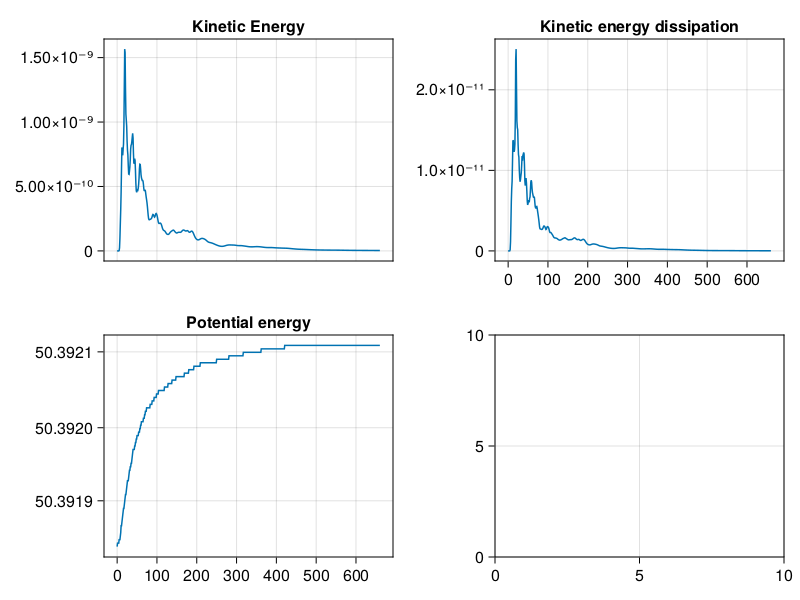

In [7]:
fig = Figure(size = (1000, 1000))
ax = [Axis(fig[i, j]) for i ∈ 1:2, j ∈ 1:2]
lines!(ax[1], t, ∫Eₖ)
ax[1].title = "Kinetic Energy"
lines!(ax[2], t, -∫Eₚ)
hidexdecorations!(ax[1], grid = false)
ax[2].title = "Potential energy"
lines!(ax[3], t, ∫ϵ)
ax[3].title = "Kinetic energy dissipation"
fig

## Energetic computations

Some of these are done on the fly and some are done (or can be done to check) in post processing.

The kinetic energy and turbulent kinetic energy dissipation is computed on the fly using [Oceanostics.jl](https://github.com/tomchor/Oceanostics.jl).
The potential energy is computed on the fly using a `KernelFunctionOperation` I wrote into TwoLayerDirectNumericalShenanigans.
These quantites are all saved in `computed_output.nc`.
See ths plotted quantities above.

Post processing is done using `energetics_animations.jl` and saved in `energy_diagnostics.nc`.
This file contains a post processing calculation of potential energy as well as background potential energy (these can then be used to get the available potential energy).

I thought I saved the vertical buoyancy flux but will have to do this later as it is not there or did not work.

In [14]:
en_ds = NCDataset(energetics)
t = en_ds[:time][:] ./ 60
∫Eb = en_ds[:∫Eb][:] 
∫Ep = en_ds[:∫Ep][:]
∫ϵ = en_ds[:∫ϵ][:]
close(en_ds)

closed Dataset

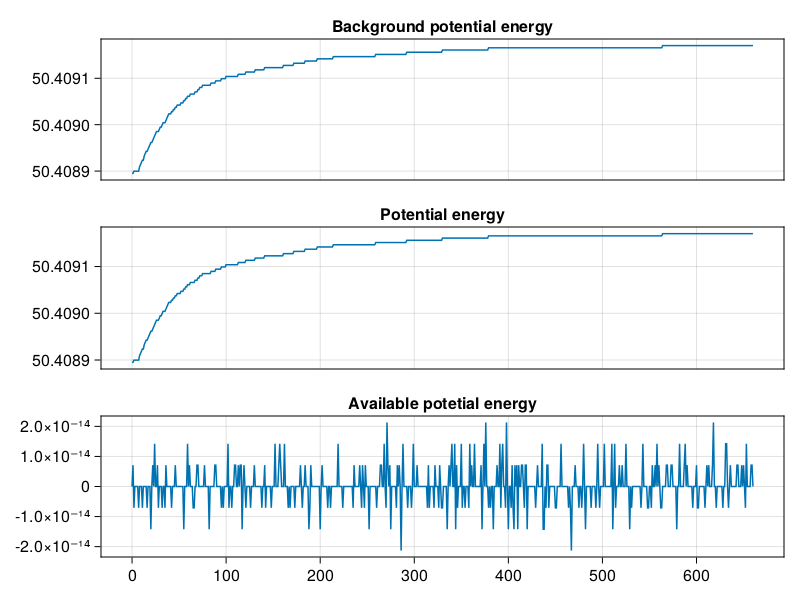

In [18]:
fig = Figure(size = (1000, 1000))
ax = [Axis(fig[i, 1]) for i ∈ 1:3]
lines!(ax[1], t, ∫Eb)
ax[1].title = "Background potential energy"
lines!(ax[2], t, ∫Ep)
hidexdecorations!(ax[1], grid = false)
ax[2].title = "Potential energy"
lines!(ax[3], t, ∫Ep .- ∫Eb)
hidexdecorations!(ax[2], grid = false)
ax[3].title = "Available potetial energy"
fig

In [34]:
σ = reshape(σ, :)

21526400-element Vector{Float64}:
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
 1027.7054642152693
    ⋮
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474
 1027.7008428981474

In [24]:
p = sortperm(σ)

21526400-element Vector{Int64}:
 12077119
 12077242
 12077118
 12077243
 12077244
 12077367
 12076994
 12077117
 12077120
 12077241
 12077366
 12076993
 12076995
        ⋮
 10842958
 10978247
 11024501
 10994615
 10994739
 10965104
 10949978
 10994863
 10858213
 10995609
 10949726
 10980107

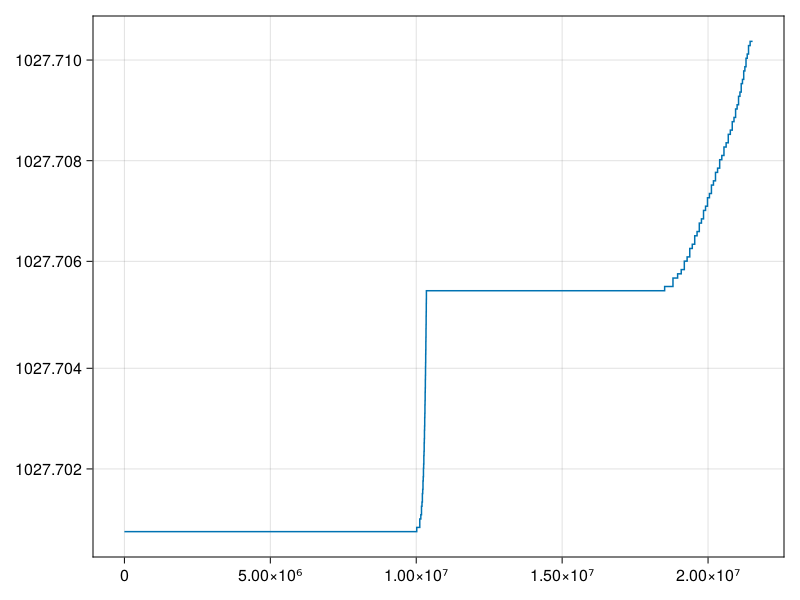

In [27]:
lines(1:length(p), σ[p])

In [ ]:
# Plot average σ at depth and check further that the background potential energy is being correctly computed. 

# Average density at constant depth to compare.

# Look to use density anomaly.

# Difference will be area between the two curves.